# Mega Case Study

## Part 1 - SOM

### Importing the libraries

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=aa4e1882b4395381c2cc96cfee84d81b5f736e66531958eb380fa6559e14f9d2
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [5]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

FileNotFoundError: [Errno 2] No such file or directory: 'Credit_Card_Applications.csv'

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### Training the SOM

In [1]:
from minisom import MiniSom
som = MiniSom(x=20, y=20, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

NameError: name 'X' is not defined

### Visualizing the results

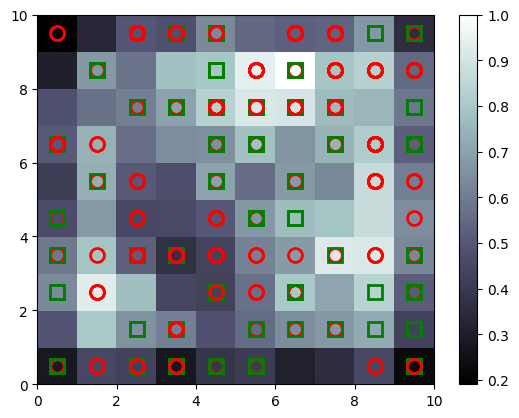

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15637891
15627190
15568878
15605276
15580366
15594651
15785339
15716276


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [ ]:
customers = dataset.iloc[:, 1:].values

### Creating the Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.7605 - loss: 0.5383
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9579 - loss: 0.2717
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9818 - loss: 0.1943
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.9898 - loss: 0.1335
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9867 - loss: 0.1101
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9884 - loss: 0.0932
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9946 - loss: 0.0654
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.9885 - loss: 0.0708
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9925 - loss: 0.0564
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9935 - loss: 0.0482


### Predicting the test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [ ]:
print(y_pred)

[[1.57901130e+07 2.16397886e-10]
 [1.56114090e+07 6.76948844e-08]
 [1.56364540e+07 1.66267640e-07]
 ...
 [1.57053790e+07 8.70748311e-02]
 [1.56214230e+07 1.04104124e-01]
 [1.57997850e+07 1.06794007e-01]]
